In [327]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### First there is an error importing the data, hence we will first determine the best enconding possible for the file, then ingore the remaining errors

In [232]:
pip install chardet 

Note: you may need to restart the kernel to use updated packages.


In [233]:
import chardet

In [234]:
with open("SpeedDatingData.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7292458070575607, 'language': ''}

We now have a 72% confidence on windows-1252 being the best encoder to be used

In [235]:
df=pd.read_csv("SpeedDatingData.csv",encoding="Windows-1252", encoding_errors="ignore")

In [236]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)

### Checking the data structure

In [237]:
df.describe(include="all")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [238]:
df.info(verbose =True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 195 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    iid       8378 non-null   int64  
 1    id        8377 non-null   float64
 2    gender    8378 non-null   int64  
 3    idg       8378 non-null   int64  
 4    condtn    8378 non-null   int64  
 5    wave      8378 non-null   int64  
 6    round     8378 non-null   int64  
 7    position  8378 non-null   int64  
 8    positin1  6532 non-null   float64
 9    order     8378 non-null   int64  
 10   partner   8378 non-null   int64  
 11   pid       8368 non-null   float64
 12   match     8378 non-null   int64  
 13   int_corr  8220 non-null   float64
 14   samerace  8378 non-null   int64  
 15   age_o     8274 non-null   float64
 16   race_o    8305 non-null   float64
 17   pf_o_att  8289 non-null   float64
 18   pf_o_sin  8289 non-null   float64
 19   pf_o_int  8289 non-null   float64
 20   pf_o_f

C:\Users\nicol\AppData\Local\Temp/ipykernel_20232/2094392453.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose =True, null_counts=True)


### Cleaning the data
----

In [239]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [240]:
import tabulate

In [241]:
#list of na values
temp=df.isna().sum().sort_values(ascending=True)
print(temp.to_markdown())

|          |    0 |
|:---------|-----:|
| iid      |    0 |
| dec_o    |    0 |
| samerace |    0 |
| match    |    0 |
| partner  |    0 |
| order    |    0 |
| position |    0 |
| dec      |    0 |
| wave     |    0 |
| condtn   |    0 |
| idg      |    0 |
| gender   |    0 |
| round    |    0 |
| id       |    1 |
| pid      |   10 |
| race     |   63 |
| field    |   63 |
| race_o   |   73 |
| hiking   |   79 |
| dining   |   79 |
| exercise |   79 |
| goal     |   79 |
| sports   |   79 |
| go_out   |   79 |
| museums  |   79 |
| attr2_1  |   79 |
| tvsports |   79 |
| art      |   79 |
| tv       |   79 |
| clubbing |   79 |
| reading  |   79 |
| sinc2_1  |   79 |
| theater  |   79 |
| movies   |   79 |
| concerts |   79 |
| music    |   79 |
| shopping |   79 |
| yoga     |   79 |
| attr1_1  |   79 |
| sinc1_1  |   79 |
| gaming   |   79 |
| from     |   79 |
| imprace  |   79 |
| intel1_1 |   79 |
| intel2_1 |   79 |
| fun2_1   |   79 |
| imprelig |   79 |
| field_cd |   82 |


In [242]:
#droping lines if all nan
df.dropna(how='all',inplace=True)
#Replacing nan in race to value 6 which is other
df['race'] = df['race'].fillna(6)
df['race_o'] = df['race_o'].fillna(6)
#same for field, 18 is other
df['field'] = df['field'].fillna("other")
df['field_cd'] = df['field_cd'].fillna(18)
#same for career, 15 is other
df['career'] = df['career'].fillna("other")
df['career_c'] = df['career_c'].fillna(15)
#droping nan for yoga, because it's also nan in the other columns
df.dropna(subset=['yoga'],inplace=True)
#only 1 line
df['id'] = df['id'].fillna(99999)

##### Normalizing the values for the attributes, converting wave 6/9  to the same method used on the other waves (sum of 100 intead of 1-10 ofr each item). Furthermore data as not correct before with scores above 10 filled
---

In [243]:
def convertattributes(dataframe):
    #for XXX_1
    mask = (df['wave'] >=6) & (df['wave'] <=9)
    for i in dataframe[mask].index:
        if dataframe.iloc[i,69:75].sum()==0:
            dataframe.iloc[i,69:74]=9999
        else:
            total=dataframe.iloc[i,69:75].sum()
            dataframe.iloc[i,69:74]*=(100/total)
    #for XXX_4
        if dataframe.iloc[i,75:81].sum()==0:
            dataframe.iloc[i,69:74]=9999
        else:
            total2=dataframe.iloc[i,75:81].sum()
            dataframe.iloc[i,69:74]*=(100/total2)
 #for XXX_2
        if dataframe.iloc[i,81:87].sum()==0:
            dataframe.iloc[i,69:74]=9999
        else:
            total3=dataframe.iloc[i,81:87].sum()
            dataframe.iloc[i,69:74]*=(100/total3)

In [244]:
#applying the function
convertattributes(df)

In [245]:
#Droping the lines with total=0, as they are empty
for i in [69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86]:
    df.drop(df[df.iloc[:,i]== 9999].index, inplace=True)

In [ ]:
#Mapping the races to actual strings instead of numbers
df['race'] = df['race'].map({1: "Black/African American", 2:"Caucasian",3:"Latino/Hispanic American",4:"Asian/Pacific Islander/Asian-American",5:"Native American",6:"Other"})

In [374]:
#Mapping the gender to actual strings instead of numbers
df['gender'] = df['gender'].map({0: "Female", 1:"Male"})

## Starting the EDA itself

----

In [246]:
pd.crosstab(index=df['match'],columns="count")

col_0,count
match,
0,6934
1,1365


In [247]:
print(f"Only {round(1380/6998,3)*100}% of people matched and got a second date")

Only 19.7% of people matched and got a second date


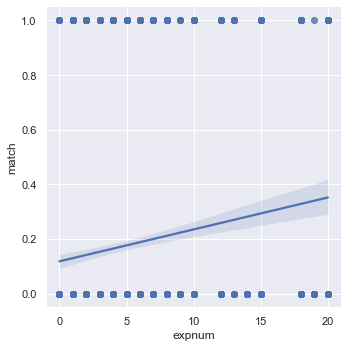

In [248]:
sns.lmplot(x="expnum", y="match", data=df)

#People are self aware, there is a correlation between the number of interest they think they will get and if they actually got a match or not

In [249]:
dfheatmap=df[["attr1_s","sinc1_s","intel1_s","fun1_s","amb1_s","shar1_s","attr3_s","sinc3_s","intel3_s","fun3_s","amb3_s"]].corr()

<AxesSubplot:>

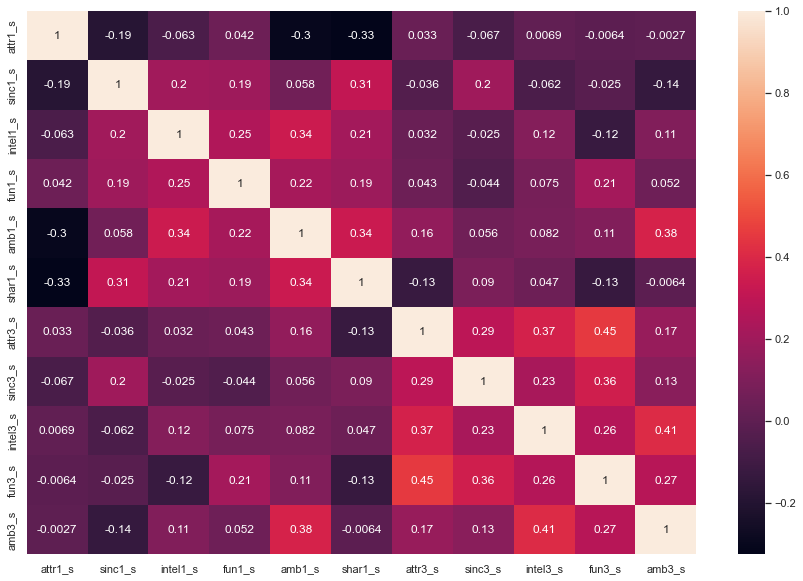

In [250]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(dfheatmap, annot=True, ax=ax)

2 things we can learn:  
-First, there is a tendency for some people to have a high opinion of themselves, if they believe they are attractive, they will also tend to believe they are intelligent and sincere (correlation between the ..."_s is around 0.3-0.4)  
-Second, there is surprinsgly low correlation between how people perceive themselves and what they seek. For example correlation between being attractive and looking for an attractive partner is only at 0.033, 0.12 for intelligence.

In [251]:
df.corr()["match"].abs().sort_values(ascending=False).head(20)

match       1.000000
dec_o       0.523276
dec         0.520178
like_o      0.304839
like        0.303982
fun         0.276669
fun_o       0.276506
shar_o      0.269401
shar        0.267765
attr_o      0.260179
attr        0.258271
prob_o      0.255633
prob        0.254924
them_cal    0.202901
intel_o     0.168883
intel       0.168671
sinc_o      0.164145
sinc        0.163614
num_in_3    0.156042
expnum      0.143755
Name: match, dtype: float64

Looking at criteria which have the biggest impact on match, first is dec and dec_o, which is the decision, which is obvious, same for like directly representing the match potential. Then we see it's fun, then shared interest/hobbies, and attractiveness, then intelligence and finally sincerity. So it seems better to give some jokes than being super sincere!

The data has several lines for the same people, if they had multiple dates

In [298]:
dfpeople = df[["iid",'gender','age','race',"field_cd"]].drop_duplicates().copy()
dfpeople.describe(include="all")

,iid,gender,age,race,field_cd
count,544.000000,544.000000,542.000000,544.000000,544.000000
mean,277.948529,0.505515,26.359779,2.801471,7.577206
std,159.423250,0.500430,3.770408,1.254501,3.794140
min,1.000000,0.000000,18.000000,1.000000,1.000000
25%,141.750000,0.000000,24.000000,2.000000,5.000000
50%,277.500000,1.000000,26.000000,2.000000,8.000000
75%,416.250000,1.000000,28.000000,4.000000,10.000000
max,552.000000,1.000000,55.000000,6.000000,18.000000


There are actualy 551 people particating in those speed datings

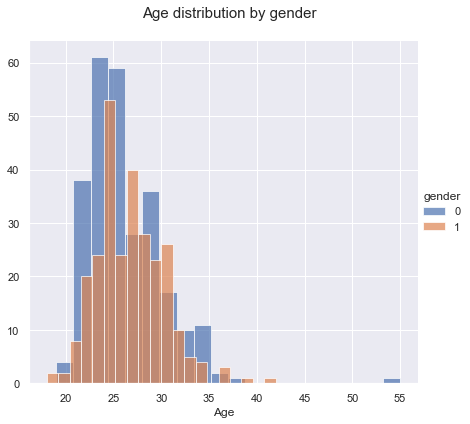

In [253]:
g = sns.FacetGrid(dfpeople, hue='gender', height = 6)
g.map(plt.hist, 'age', alpha= 0.7, bins=20)
g.set_xlabels('Age', fontsize=12)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age distribution by gender', fontsize=15)
g.add_legend()

In [254]:
dfpeople[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
             mean median   min   max count
gender                                    
0       26.126866   26.0  19.0  55.0   268
1       26.587591   27.0  18.0  42.0   274

We see a mean and median fairly close, so almost a normal distribution. Participants are mostly around 26, male being slightly olders than female

<AxesSubplot:title={'center':'Mean Age by Race'}, xlabel='race'>

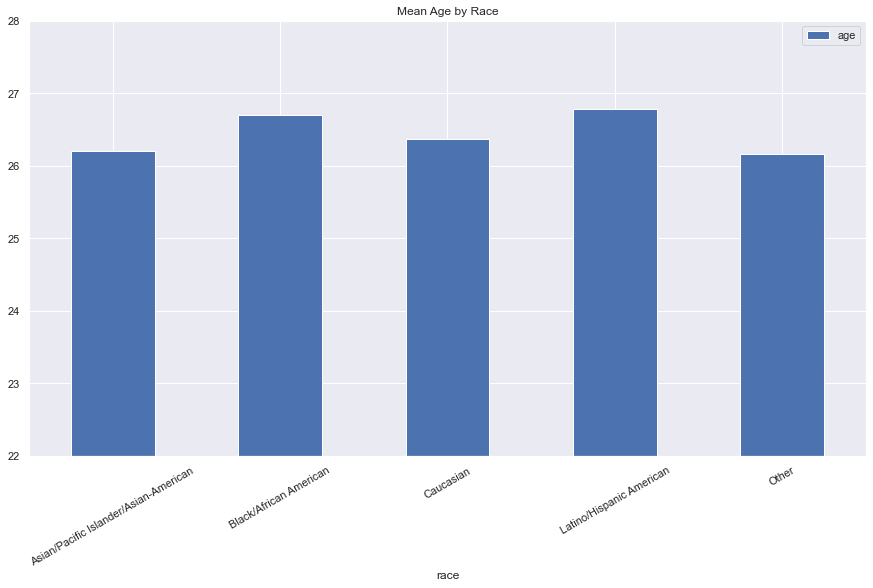

In [297]:
dfpeople[['race', 'age']].groupby('race').mean().plot(kind='bar', title='Mean Age by Race', ylim=[22,28], rot=30)


No native american took part in the speed dating, the age is fairly balanced accross races

In [299]:
dfpeople['field_cd'] = dfpeople.field_cd.map({1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med. Sc.',
                                 5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.',
                                 10: 'Nat. Sc.', 11: 'Soc. Wr.', 12: 'Und.', 13: 'Pol. Sc.',
                                 14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'})

Text(0.5, 1.0, 'Field of study')

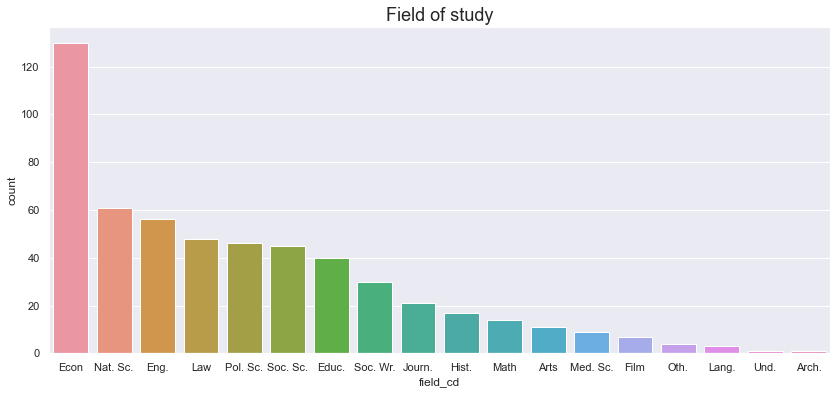

In [304]:
plt.figure(figsize = (14,6))
ax = sns.countplot(x="field_cd", data=dfpeople, order = dfpeople['field_cd'].value_counts().index)
plt.title('Field of study', fontsize=18)

We see that a lot of people study economics, natural sciences and engineering

### Checking if people behavior is in line with their declaration

---

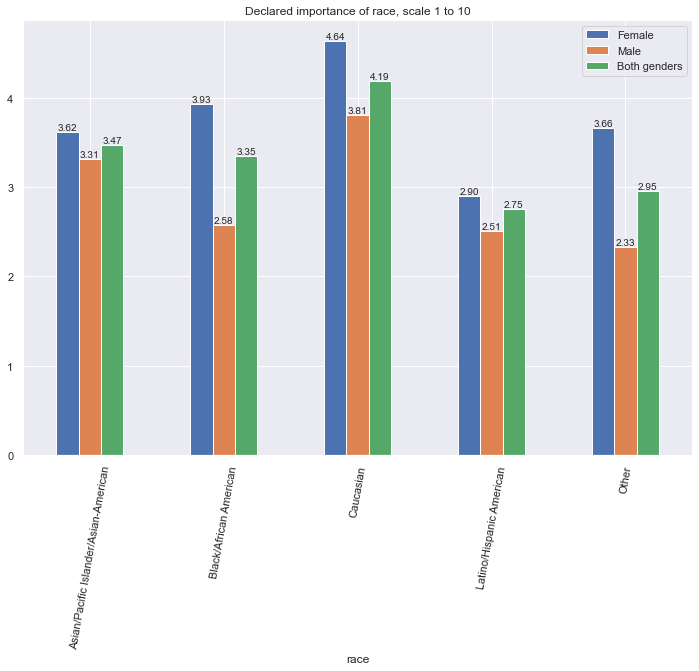

In [380]:
X = df[df.gender=="Female"][['race', 'imprace']].groupby('race').mean().index
Y = df[df.gender=="Female"][['race', 'imprace']].groupby('race').mean()
Z = df[df.gender=="Male"][['race', 'imprace']].groupby('race').mean()
XX = df[['race', 'imprace']].groupby('race').mean()

df32 = pd.DataFrame(np.c_[Y,Z,XX], index=X)
ax=df32.plot.bar(rot=80,figsize=(12,8), title="Declared importance of race, scale 1 to 10")
L=plt.legend()
L.get_texts()[0].set_text('Female')
L.get_texts()[1].set_text('Male')
L.get_texts()[2].set_text('Both genders')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.show()

We see that people declare it is moderately important, with a value between 2.33 and 4.64 out of 10. Caucasians, especially female, consider it important, Latinos of both gender do not.

Now we will check the "likes" people gave, to see if we have a similar behavior in the choices they made

C:\Users\nicol\AppData\Local\Temp/ipykernel_20232/362434392.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y = df[df.samerace==0][df.gender=="Female"][['race', 'dec']].groupby('race').mean()*100
C:\Users\nicol\AppData\Local\Temp/ipykernel_20232/362434392.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Z = df[df.samerace==1][df.gender=="Female"][['race', 'dec']].groupby('race').mean()*100
C:\Users\nicol\AppData\Local\Temp/ipykernel_20232/362434392.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  YY = df[df.samerace==0][df.gender=="Male"][['race', 'dec']].groupby('race').mean()*100
C:\Users\nicol\AppData\Local\Temp/ipykernel_20232/362434392.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ZZ = df[df.samerace==1][df.gender=="Male"][['race', 'dec']].groupby('race').mean()*100


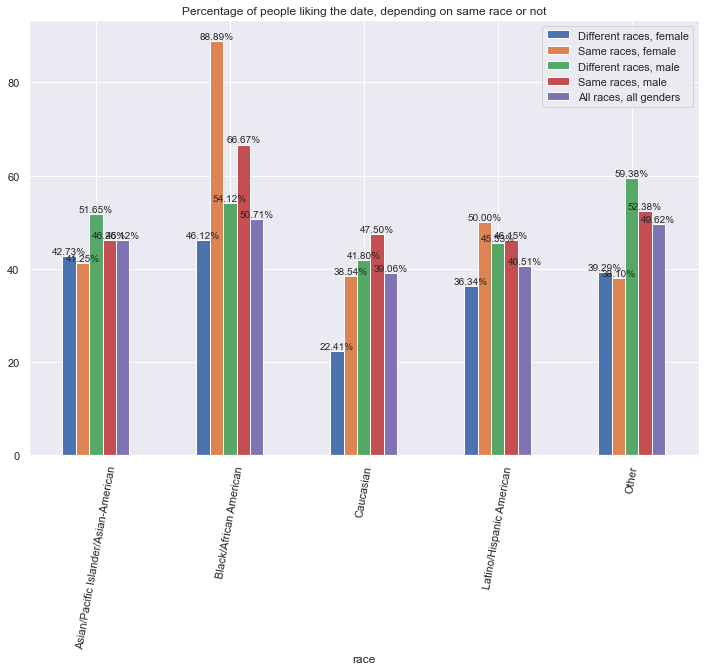

In [383]:

X = df[df.samerace==0][['race', 'dec']].groupby('race').mean().index
Y = df[df.samerace==0][df.gender=="Female"][['race', 'dec']].groupby('race').mean()*100
Z = df[df.samerace==1][df.gender=="Female"][['race', 'dec']].groupby('race').mean()*100
YY = df[df.samerace==0][df.gender=="Male"][['race', 'dec']].groupby('race').mean()*100
ZZ = df[df.samerace==1][df.gender=="Male"][['race', 'dec']].groupby('race').mean()*100
XX = df[['race', 'dec']].groupby('race').mean()*100
df33 = pd.DataFrame(np.c_[Y,Z,YY,ZZ,XX], index=X)
ax=df33.plot.bar(rot=80,figsize=(12,8), title="Percentage of people liking the date, depending on same race or not")
L=plt.legend()
L.get_texts()[0].set_text('Different races, female')
L.get_texts()[1].set_text('Same races, female')
L.get_texts()[2].set_text('Different races, male')
L.get_texts()[3].set_text('Same races, male')
L.get_texts()[4].set_text('All races, all genders')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')
plt.show()

We can learn a lot of things here  
1) Caucasian female were the highest in saying race was important, and indeed, they gave two times more likes to people of the same race, the behavior seems consistant, even if they are more picky than women of other races.  
2) Black / african american women put importance of race 0.7 points below caucasian females, but behave in a similar way with 2 times more like if you are of the same race. They are also less picky with an 89% of likes given for same race!  
3) Asian / Pacific Islanders / Asian american declare that race is relatively important, with 3.47, higher than  black / african american, but instead give more likes to people of other races. This illustrate quite a difference between declaration and actual behavior  
4) Latinos declared it was not really important, and it is reflected in their decision